<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/Data_Visualization_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For nicer plots
sns.set(style="whitegrid")

df = pd.read_csv("Fifa_world_cup_matches.csv")

# Inspect the first few rows
print(df.head())

           team1         team2 possession team1 possession team2  \
0          QATAR       ECUADOR              42%              50%   
1        ENGLAND          IRAN              72%              19%   
2        SENEGAL   NETHERLANDS              44%              45%   
3  UNITED STATES         WALES              51%              39%   
4      ARGENTINA  SAUDI ARABIA              64%              24%   

  possession in contest  number of goals team1  number of goals team2  \
0                    8%                      0                      2   
1                    9%                      6                      2   
2                   11%                      0                      2   
3                   10%                      1                      1   
4                   12%                      1                      2   

          date     hour category  ...  penalties scored team1  \
0  20 NOV 2022  17 : 00  Group A  ...                       0   
1  21 NOV 2022  14 : 0

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Since your dataset has no weight/height/type columns,
# we fill missing values for all numerical columns using median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns with "Unknown"
categorical_cols = ['team1', 'team2', 'date', 'hour', 'category']

for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)

# Drop rows if critical columns are missing
# Here we consider match-related columns as important
critical_cols = ['team1', 'team2', 'number of goals team1', 'number of goals team2']

df.dropna(subset=critical_cols, inplace=True)


team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64


/tmp/ipython-input-2018062459.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2018062459.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
print(df.columns)

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

/tmp/ipython-input-729921911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="total_goals", data=df, estimator="mean", errorbar=None, palette="Set2")


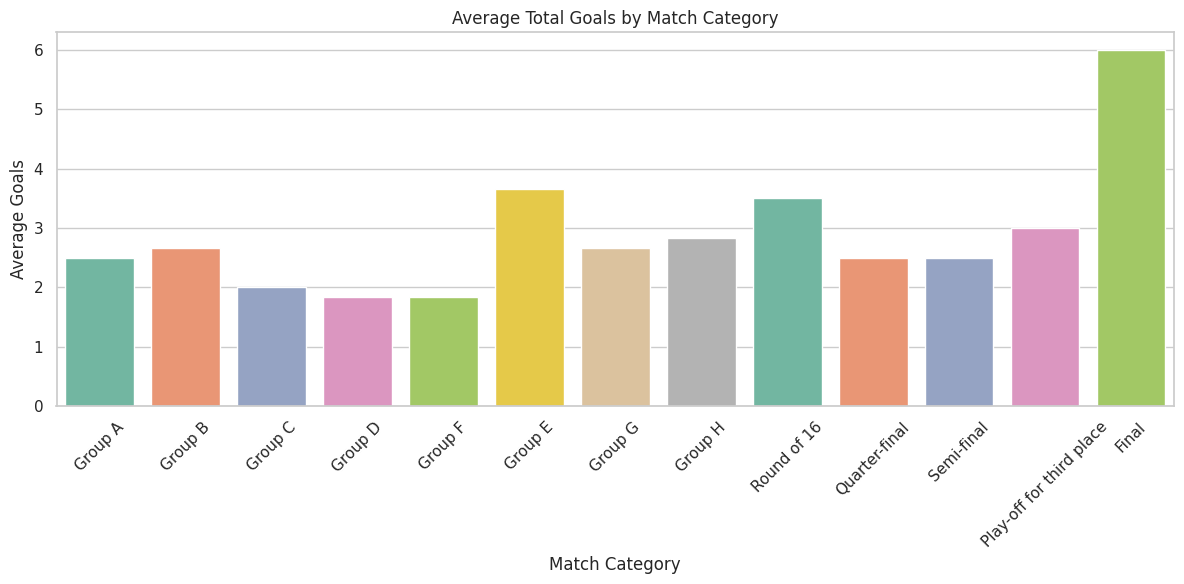

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="category", y="total_goals", data=df, estimator="mean", errorbar=None, palette="Set2")
plt.title("Average Total Goals by Match Category")
plt.xlabel("Match Category")
plt.ylabel("Average Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1351095756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="possession team1", data=df, estimator="mean", errorbar=None, palette="Set1")


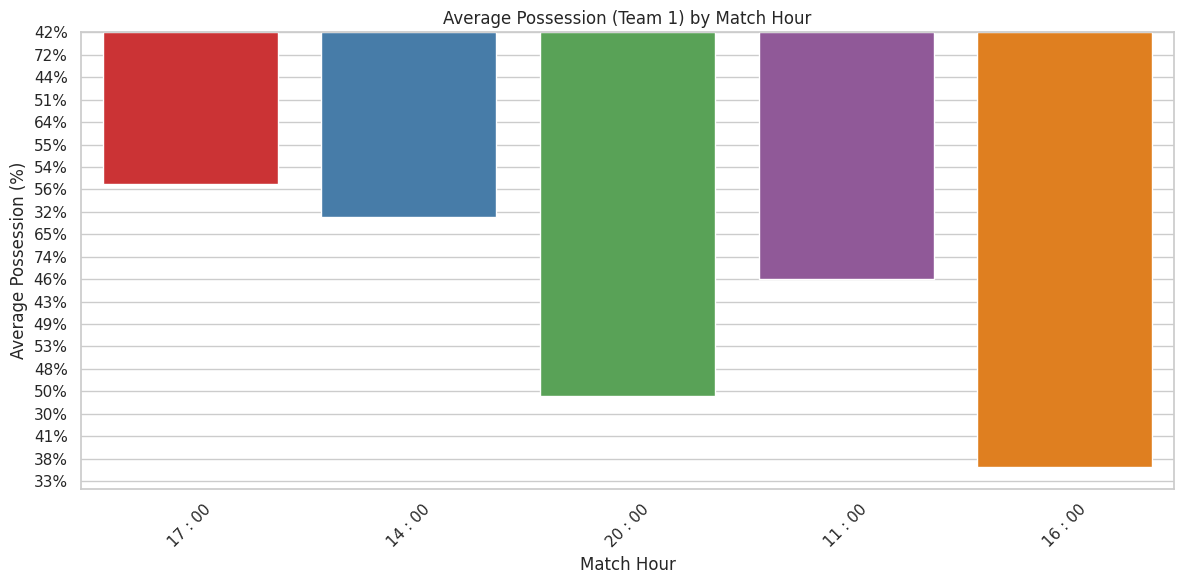

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="hour", y="possession team1", data=df, estimator="mean", errorbar=None, palette="Set1")
plt.title("Average Possession (Team 1) by Match Hour")
plt.xlabel("Match Hour")
plt.ylabel("Average Possession (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


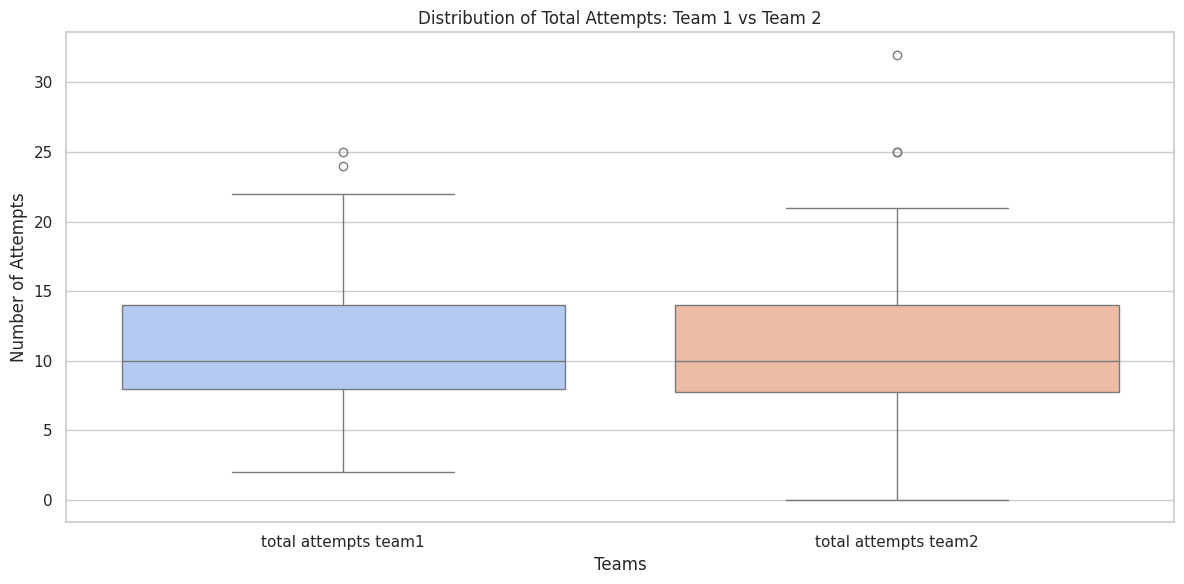

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[['total attempts team1', 'total attempts team2']],
    palette="coolwarm"
)
plt.title("Distribution of Total Attempts: Team 1 vs Team 2")
plt.xlabel("Teams")
plt.ylabel("Number of Attempts")
plt.tight_layout()
plt.show()


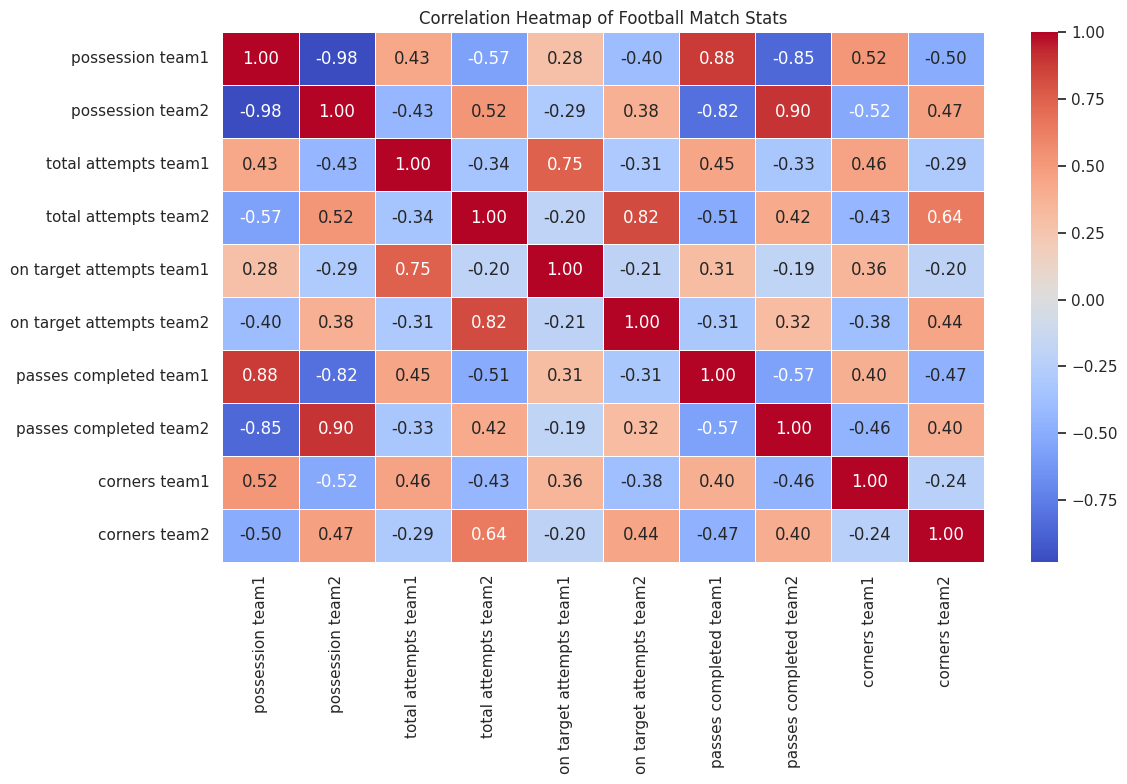

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to include
corr_cols = [
    'possession team1', 'possession team2',
    'total attempts team1', 'total attempts team2',
    'on target attempts team1', 'on target attempts team2',
    'passes completed team1', 'passes completed team2',
    'corners team1', 'corners team2'
]

# Select columns
df_corr = df[corr_cols].copy()

# Clean numeric data (remove %, commas → convert to float)
df_corr = (df_corr.apply(lambda col:
         pd.to_numeric(col.astype(str)
                           .str.replace('%', '', regex=False)
                           .str.replace(',', '', regex=False),
                       errors='coerce'))
         )

# Fill missing values with median
df_corr = df_corr.fillna(df_corr.median())

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Football Match Stats")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2597132713.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2597132713.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2597132713.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Team", y="On Target Attempts", data=df_box,


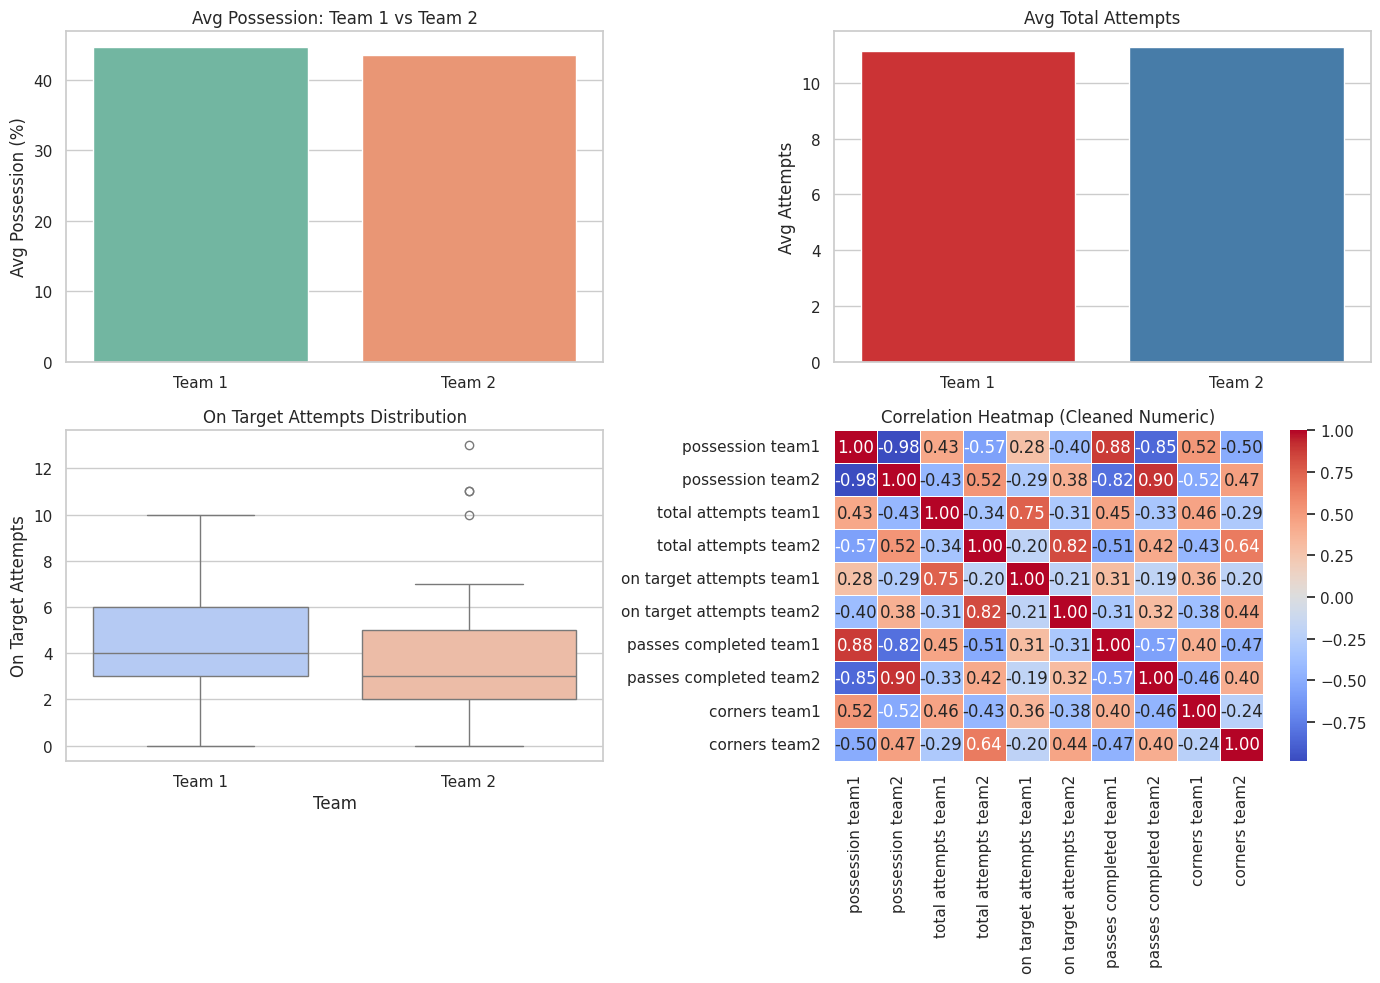

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 3D: CLEAN CORRELATION HEATMAP PREPARATION
# ---------------------------

corr_cols = [
    'possession team1', 'possession team2',
    'total attempts team1', 'total attempts team2',
    'on target attempts team1', 'on target attempts team2',
    'passes completed team1', 'passes completed team2',
    'corners team1', 'corners team2'
]

# Select columns
df_corr = df[corr_cols].copy()

# Clean numeric data (remove %, commas → float)
df_corr = df_corr.apply(lambda col: pd.to_numeric(
    col.astype(str)
       .str.replace('%', '', regex=False)
       .str.replace(',', '', regex=False),
    errors='coerce'
))

# Fill missing values
df_corr = df_corr.fillna(df_corr.median())

# Correlation matrix (for subplot 4)
correlation_matrix = df_corr.corr()

# ---------------------------
# Combined Visualization
# ---------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# ---------------------------
# 3A: Avg Possession of Team1 vs Team2
# ---------------------------
sns.barplot(
    x=['Team 1', 'Team 2'],
    y=[df_corr['possession team1'].mean(), df_corr['possession team2'].mean()],
    palette="Set2",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Avg Possession: Team 1 vs Team 2")
axes[0, 0].set_ylabel("Avg Possession (%)")


# ---------------------------
# 3B: Avg Total Attempts (Team1 vs Team2)
# ---------------------------
sns.barplot(
    x=['Team 1', 'Team 2'],
    y=[df_corr['total attempts team1'].mean(), df_corr['total attempts team2'].mean()],
    palette="Set1",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Avg Total Attempts")
axes[0, 1].set_ylabel("Avg Attempts")


# ---------------------------
# 3C: On Target Attempts Distribution (Boxplot)
# ---------------------------
df_box = pd.DataFrame({
    "Team": ["Team 1"] * len(df_corr) + ["Team 2"] * len(df_corr),
    "On Target Attempts": pd.concat([
        df_corr["on target attempts team1"],
        df_corr["on target attempts team2"]
    ], ignore_index=True)
})

sns.boxplot(x="Team", y="On Target Attempts", data=df_box,
            palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("On Target Attempts Distribution")


# ---------------------------
# 3D: Correlation Heatmap (Latest Version)
# ---------------------------
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Correlation Heatmap (Cleaned Numeric)")


# Final layout
plt.tight_layout()
plt.show()


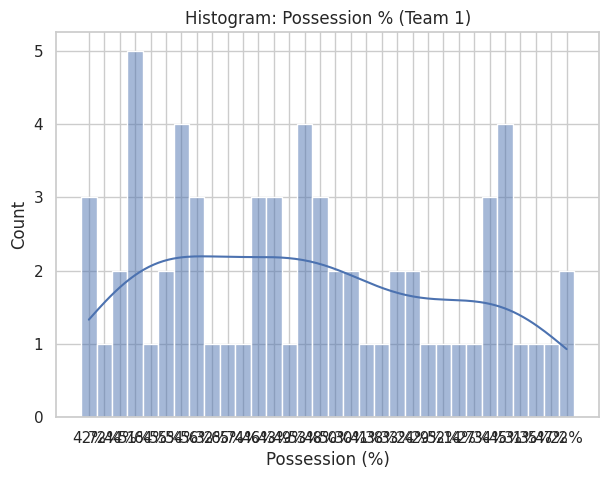

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['possession team1'], bins=10, kde=True)
plt.title("Histogram: Possession % (Team 1)")
plt.xlabel("Possession (%)")
plt.show()


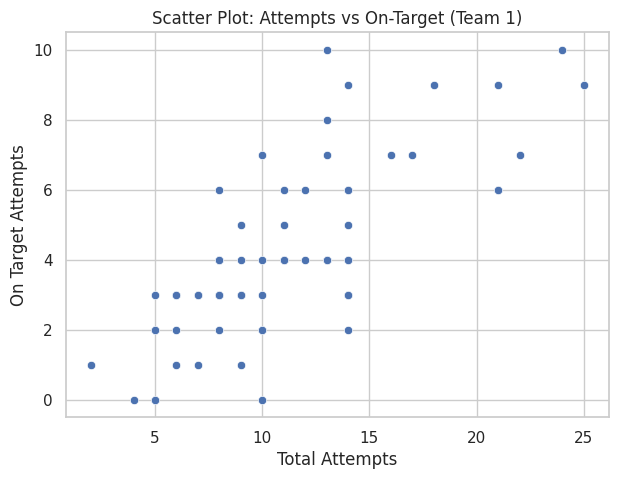

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['total attempts team1'], y=df['on target attempts team1'])
plt.title("Scatter Plot: Attempts vs On-Target (Team 1)")
plt.xlabel("Total Attempts")
plt.ylabel("On Target Attempts")
plt.show()


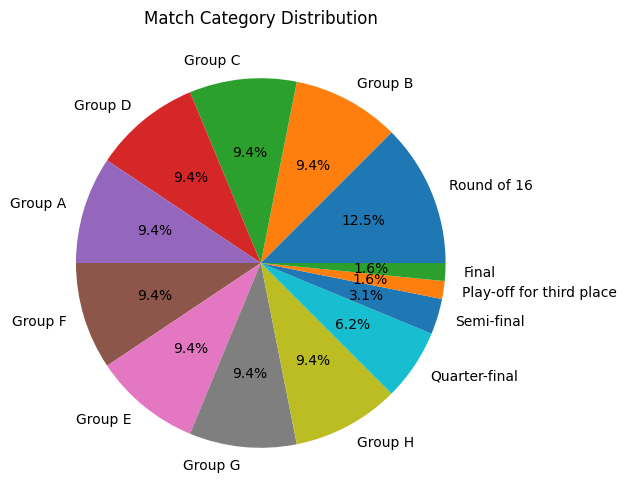

In [10]:
import matplotlib.pyplot as plt

category_counts = df['category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Match Category Distribution")
plt.show()


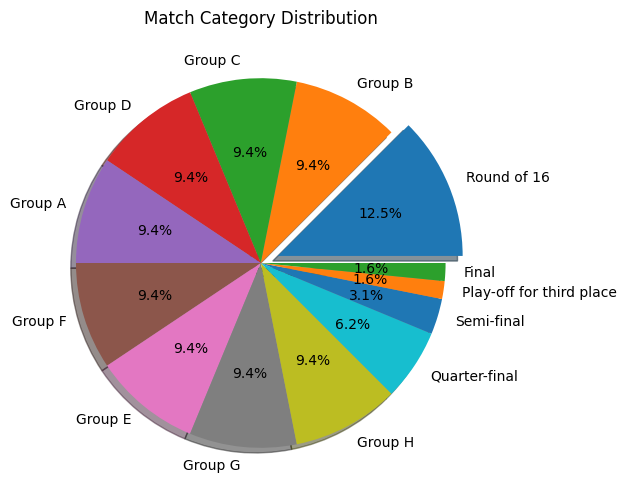

In [11]:
# Exploded Pie Chart: Category Distribution

labels = df['category'].value_counts().index
sizes = df['category'].value_counts().values

# Explode only the largest category slice
explode = [0.1 if size == max(sizes) else 0 for size in sizes]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Match Category Distribution")
plt.show()


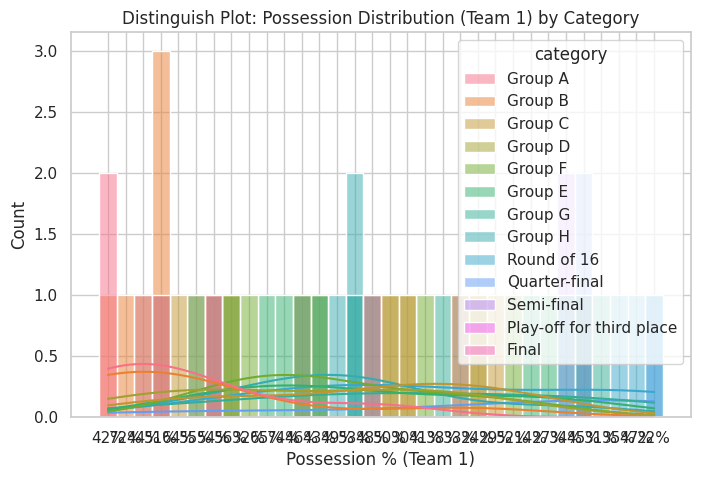

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='possession team1', hue='category', kde=True)
plt.title("Distinguish Plot: Possession Distribution (Team 1) by Category")
plt.xlabel("Possession % (Team 1)")
plt.show()
